# Task 1:  CREDIT CARD FRAUD DETECTION
#### In this task, I am building a model to classify credit card transaction as fraudulent or legitimate using machine learning models such as LogisticRegression,DecisionTreeClassifier and RandomForestClassifier.

## Import required libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Data collection

In [2]:
data_dir = "fraud-detection"

In [3]:
os.listdir(data_dir)

['fraudTest.csv', 'fraudTrain.csv']

In [4]:
dataset_path = data_dir

In [5]:
csv_path_train = os.path.join(dataset_path,"fraudTrain.csv")
csv_path_test = os.path.join(dataset_path,"fraudTest.csv")

In [6]:
df_train = pd.read_csv(csv_path_train)
df_test = pd.read_csv(csv_path_test)

In [7]:
print(f" Training dataset length: {df_train.shape}")
print(f" Testing dataset length: {df_train.shape}")

 Training dataset length: (1296675, 23)
 Testing dataset length: (1296675, 23)


In [8]:
df = pd.concat([df_train,df_test] , ignore_index = True)

In [9]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


# Data Preprocessing

In [10]:
df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [11]:
df.dtypes

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

In [12]:
print(df.select_dtypes(include = ["number"]).columns)
print("+"*50)
print(df.select_dtypes(include = ["object"]).columns)

Index(['Unnamed: 0', 'cc_num', 'amt', 'zip', 'lat', 'long', 'city_pop',
       'unix_time', 'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')
++++++++++++++++++++++++++++++++++++++++++++++++++
Index(['trans_date_trans_time', 'merchant', 'category', 'first', 'last',
       'gender', 'street', 'city', 'state', 'job', 'dob', 'trans_num'],
      dtype='object')


In [13]:
df["year"] = pd.DatetimeIndex(df["trans_date_trans_time"]).year.astype(int).astype(str)

In [14]:
df["hour"] =  pd.DatetimeIndex(df["trans_date_trans_time"]).hour

In [15]:
df["month"] =  pd.DatetimeIndex(df["trans_date_trans_time"]).month

In [16]:
df["day_of_week"] =  pd.DatetimeIndex(df["trans_date_trans_time"]).dayofweek+1

In [17]:
df["day"] =  pd.DatetimeIndex(df["trans_date_trans_time"]).day

In [18]:
df = df.drop("trans_date_trans_time",axis = 1)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 27 columns):
 #   Column       Dtype  
---  ------       -----  
 0   Unnamed: 0   int64  
 1   cc_num       int64  
 2   merchant     object 
 3   category     object 
 4   amt          float64
 5   first        object 
 6   last         object 
 7   gender       object 
 8   street       object 
 9   city         object 
 10  state        object 
 11  zip          int64  
 12  lat          float64
 13  long         float64
 14  city_pop     int64  
 15  job          object 
 16  dob          object 
 17  trans_num    object 
 18  unix_time    int64  
 19  merch_lat    float64
 20  merch_long   float64
 21  is_fraud     int64  
 22  year         object 
 23  hour         int32  
 24  month        int32  
 25  day_of_week  int32  
 26  day          int32  
dtypes: float64(5), int32(4), int64(6), object(12)
memory usage: 353.3+ MB


In [20]:
df.gender.head()

0    F
1    F
2    M
3    M
4    M
Name: gender, dtype: object

In [21]:
df.gender.value_counts()

gender
F    1014749
M     837645
Name: count, dtype: int64

In [22]:
# df["gender"] = df["gender"].map({'M':0 , 'F':1})

In [23]:
df.gender.unique()

array(['F', 'M'], dtype=object)

In [24]:
# drop column " Unnamed: 0 '

df_outliers = df.drop(["Unnamed: 0"] , axis = 1)

In [25]:
df_outliers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 26 columns):
 #   Column       Dtype  
---  ------       -----  
 0   cc_num       int64  
 1   merchant     object 
 2   category     object 
 3   amt          float64
 4   first        object 
 5   last         object 
 6   gender       object 
 7   street       object 
 8   city         object 
 9   state        object 
 10  zip          int64  
 11  lat          float64
 12  long         float64
 13  city_pop     int64  
 14  job          object 
 15  dob          object 
 16  trans_num    object 
 17  unix_time    int64  
 18  merch_lat    float64
 19  merch_long   float64
 20  is_fraud     int64  
 21  year         object 
 22  hour         int32  
 23  month        int32  
 24  day_of_week  int32  
 25  day          int32  
dtypes: float64(5), int32(4), int64(5), object(12)
memory usage: 339.2+ MB


In [26]:
df_outliers.year.head()

0    2019
1    2019
2    2019
3    2019
4    2019
Name: year, dtype: object

In [27]:
df_outliers["year"] = pd.to_numeric(df['year'], errors='coerce', downcast='integer')

In [28]:
df_outliers.year.head()

0    2019
1    2019
2    2019
3    2019
4    2019
Name: year, dtype: int16

In [29]:
print(df_outliers.select_dtypes(include = ["number"]).columns)
print("="*60)
print(df_outliers.select_dtypes(include = ["object"]).columns)

Index(['cc_num', 'amt', 'zip', 'lat', 'long', 'city_pop', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud', 'year', 'hour', 'month',
       'day_of_week', 'day'],
      dtype='object')
Index(['merchant', 'category', 'first', 'last', 'gender', 'street', 'city',
       'state', 'job', 'dob', 'trans_num'],
      dtype='object')


In [30]:
col = ['cc_num', 'amt', 'zip', 'lat', 'long', 'city_pop',
       'unix_time', 'merch_lat', 'merch_long', 'is_fraud', 'year', 'hour',
       'month', 'day_of_week', 'day']

 Column name:cc_num


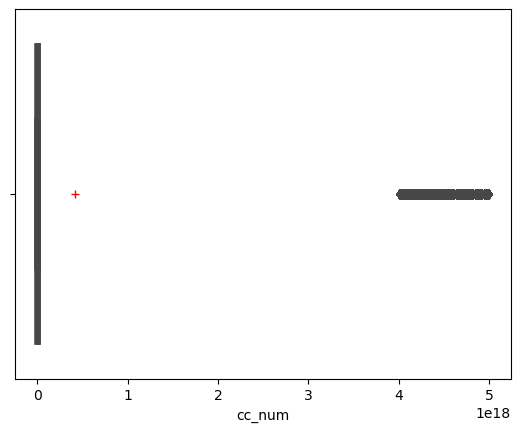

 Column name:amt


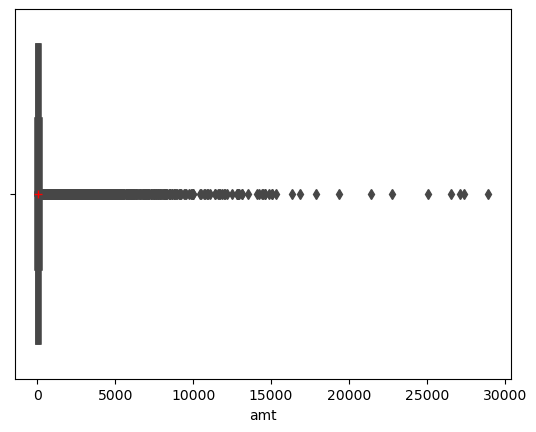

 Column name:zip


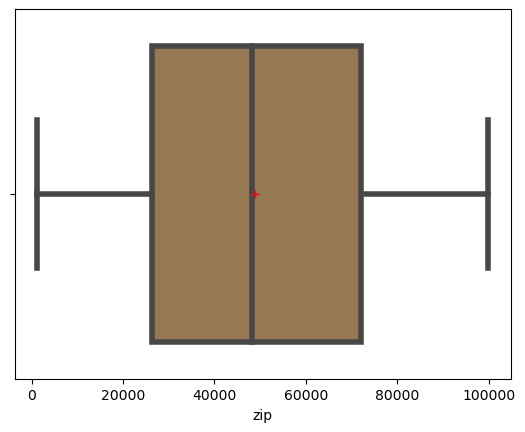

 Column name:lat


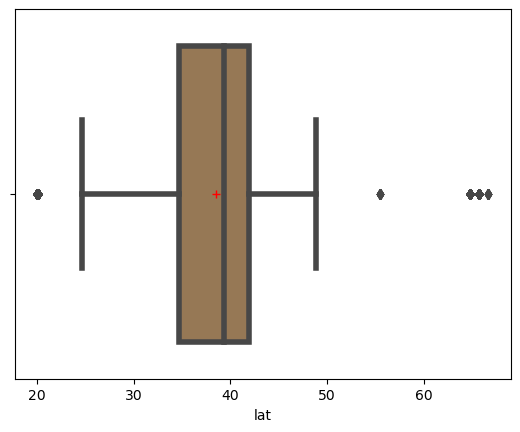

 Column name:long


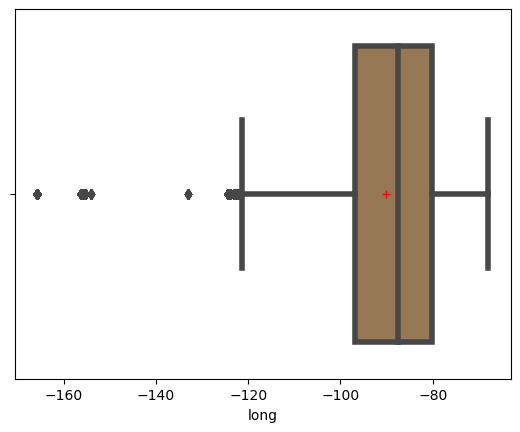

 Column name:city_pop


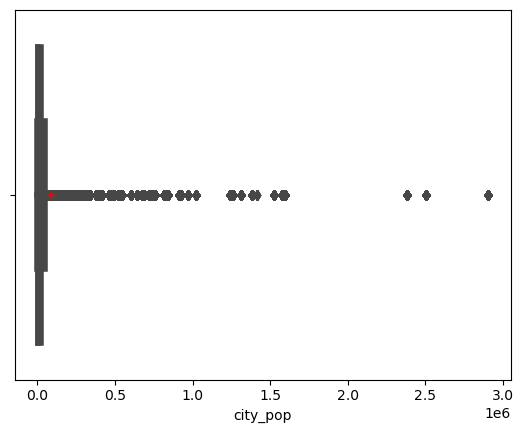

 Column name:unix_time


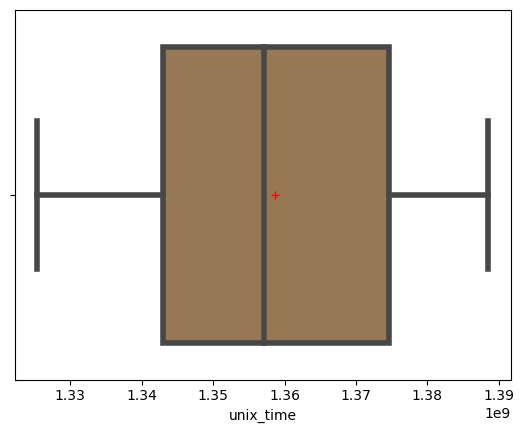

 Column name:merch_lat


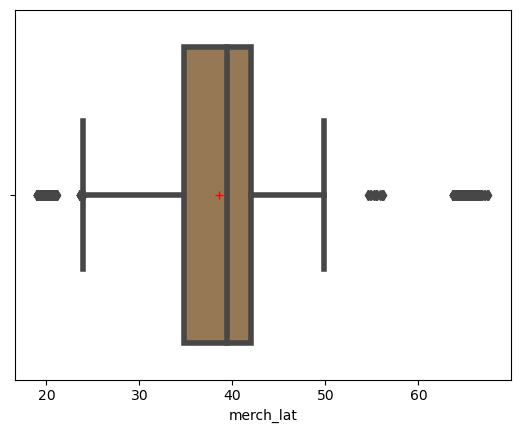

 Column name:merch_long


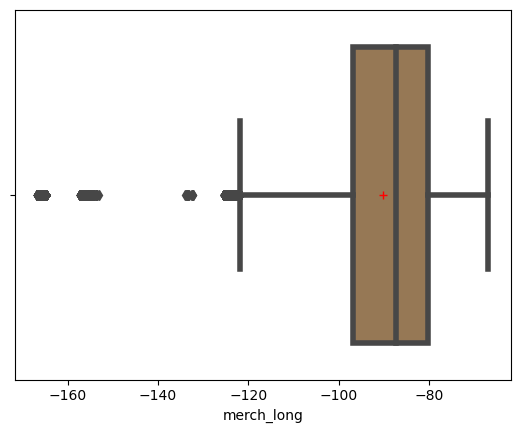

 Column name:is_fraud


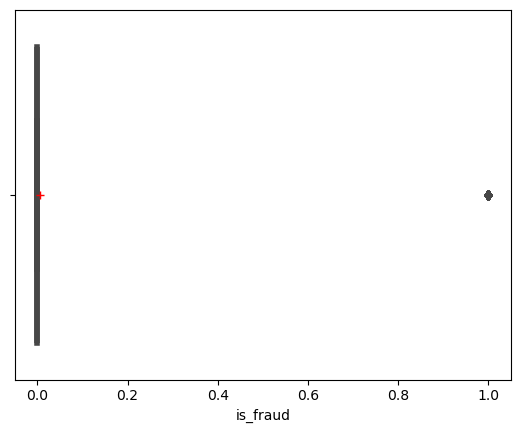

 Column name:year


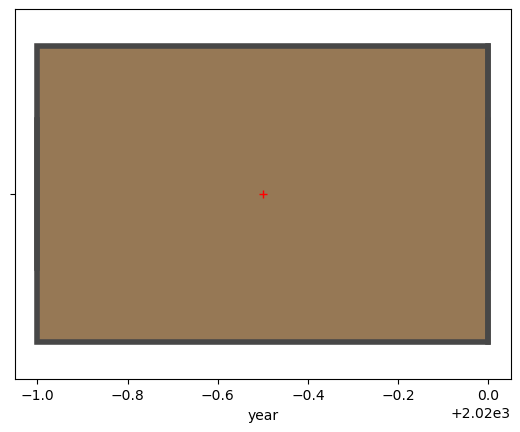

 Column name:hour


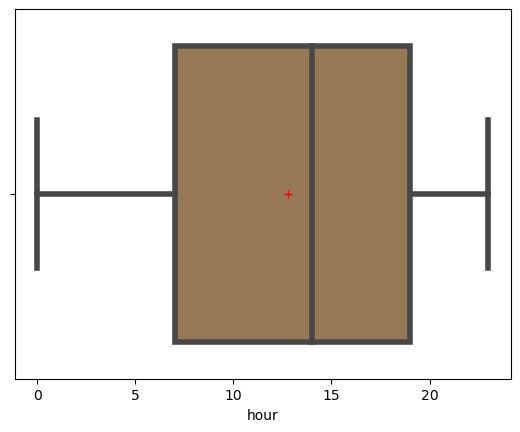

 Column name:month


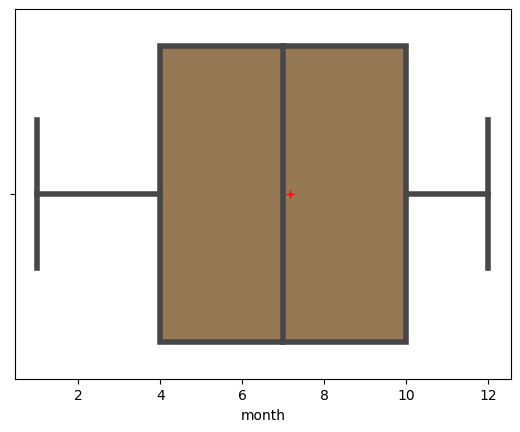

 Column name:day_of_week


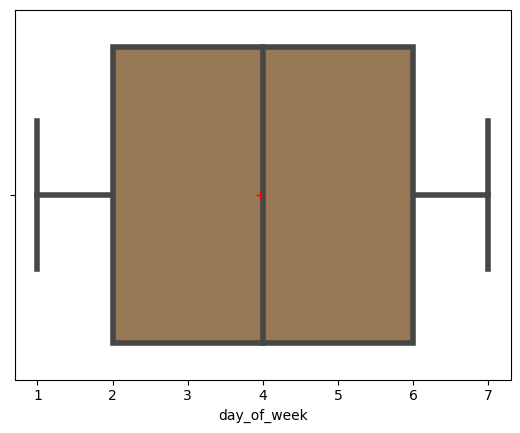

 Column name:day


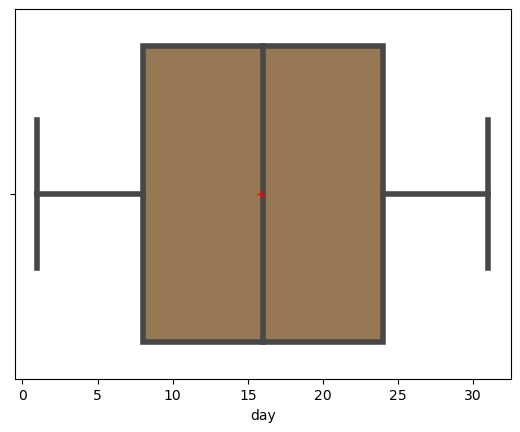

In [31]:
for x in col:
    print(f" Column name:{x}")
    #sns.set(style ="whitegrid")
    sns.color_palette("mako", as_cmap=True)
    sns.boxplot( x = df_outliers[x] , showmeans = True , meanprops = {"marker" : "+","markeredgecolor":"red"},
                linewidth = 4,
                palette = "cubehelix"
               # color = "orange"
                )
               
    plt.show()

In [32]:
df_outliers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 26 columns):
 #   Column       Dtype  
---  ------       -----  
 0   cc_num       int64  
 1   merchant     object 
 2   category     object 
 3   amt          float64
 4   first        object 
 5   last         object 
 6   gender       object 
 7   street       object 
 8   city         object 
 9   state        object 
 10  zip          int64  
 11  lat          float64
 12  long         float64
 13  city_pop     int64  
 14  job          object 
 15  dob          object 
 16  trans_num    object 
 17  unix_time    int64  
 18  merch_lat    float64
 19  merch_long   float64
 20  is_fraud     int64  
 21  year         int16  
 22  hour         int32  
 23  month        int32  
 24  day_of_week  int32  
 25  day          int32  
dtypes: float64(5), int16(1), int32(4), int64(5), object(11)
memory usage: 328.6+ MB


# Z_SCORE
### Outliers detection and removal using 3 standard deviation.
one of the ways we can remove outliers is remove any data points that are beyound 3 standard deviation from mean . we can come up with following upper and lower bounds


In [33]:
attri_of_outliers = ["cc_num","amt","lat","long","city_pop","merch_lat","merch_long"]

In [34]:
for x in attri_of_outliers:
    df_attri = df_outliers[x]
    print(df_attri)
    upp_limit = df_attri.mean() + 3*df_attri.std()
    low_limit = df_attri.mean() - 3*df_attri.std()
    outliers = df_outliers.loc[(df_attri>upp_limit) | (df_attri<low_limit)]
    df_no_outliers = df_outliers[(df_attri>low_limit)&(df_attri<upp_limit)]
    print(f"{df_attri} of outliers:{outliers}")
                                            

0          2703186189652095
1              630423337322
2            38859492057661
3          3534093764340240
4           375534208663984
                 ...       
1852389      30560609640617
1852390    3556613125071656
1852391    6011724471098086
1852392       4079773899158
1852393    4170689372027579
Name: cc_num, Length: 1852394, dtype: int64
0          2703186189652095
1              630423337322
2            38859492057661
3          3534093764340240
4           375534208663984
                 ...       
1852389      30560609640617
1852390    3556613125071656
1852391    6011724471098086
1852392       4079773899158
1852393    4170689372027579
Name: cc_num, Length: 1852394, dtype: int64 of outliers:                      cc_num                           merchant  \
19       4956828990005111019  fraud_Schultz, Simonis and Little   
20       4469777115158234880                 fraud_Bauch-Raynor   
24       4428780983793657331                    fraud_Lesch Ltd   
31       4599735

0          36.0788
1          48.8878
2          42.1808
3          46.2306
4          38.4207
            ...   
1852389    40.4931
1852390    29.0393
1852391    46.1966
1852392    44.6255
1852393    35.6665
Name: lat, Length: 1852394, dtype: float64 of outliers:                      cc_num                            merchant  \
28       4225990116481262579                     fraud_Kunze Inc   
236          341546199006537                 fraud_Hills-Witting   
256      4225990116481262579    fraud_Cormier, Stracke and Thiel   
433      4742883543039288059                fraud_Heller-Langosh   
671          341546199006537              fraud_Dickinson-Rempel   
...                      ...                                 ...   
1852077  4742883543039288059  fraud_Monahan, Bogisich and Ledner   
1852157  4742883543039288059            fraud_Stoltenberg-Beatty   
1852283      341546199006537  fraud_Crist, Jakubowski and Littel   
1852288  4742883543039288059                   fraud_Wat

0            3495
1             149
2            4154
3            1939
4              99
            ...  
1852389       519
1852390     28739
1852391      3684
1852392       129
1852393    116001
Name: city_pop, Length: 1852394, dtype: int64 of outliers:                   cc_num                         merchant        category  \
53            60495593109                fraud_Volkman PLC     food_dining   
105       180040027502291              fraud_Pouros-Conroy    shopping_pos   
153      3583635130604947              fraud_Cassin-Harvey     grocery_net   
203      3576431665303017                 fraud_Spinka Inc     grocery_net   
210      2264937662466770        fraud_Ledner-Pfannerstill   gas_transport   
...                   ...                              ...             ...   
1852291      503874407318            fraud_Schroeder Group  health_fitness   
1852308  3576431665303017                  fraud_Fahey Inc       kids_pets   
1852324  3583635130604947                f

0          -82.048315
1         -118.186462
2         -112.154481
3         -112.561071
4          -78.632459
              ...    
1852389    -91.333331
1852390    -96.186633
1852391   -119.715054
1852392   -117.080888
1852393    -97.036372
Name: merch_long, Length: 1852394, dtype: float64 of outliers:                      cc_num                            merchant  \
28       4225990116481262579                     fraud_Kunze Inc   
236          341546199006537                 fraud_Hills-Witting   
256      4225990116481262579    fraud_Cormier, Stracke and Thiel   
433      4742883543039288059                fraud_Heller-Langosh   
671          341546199006537              fraud_Dickinson-Rempel   
...                      ...                                 ...   
1852077  4742883543039288059  fraud_Monahan, Bogisich and Ledner   
1852157  4742883543039288059            fraud_Stoltenberg-Beatty   
1852283      341546199006537  fraud_Crist, Jakubowski and Littel   
1852288  4742883

In [35]:
df_no_outliers.shape

(1845782, 26)

In [36]:
print(f"origianl dataset with outliers  : {len(df_outliers)}")
print(f"modifiy dataset without outliers: {len(df_no_outliers)}")
print(f"Total no.of outliers in dataset : {len(df)-len(df_no_outliers)}")

origianl dataset with outliers  : 1852394
modifiy dataset without outliers: 1845782
Total no.of outliers in dataset : 6612


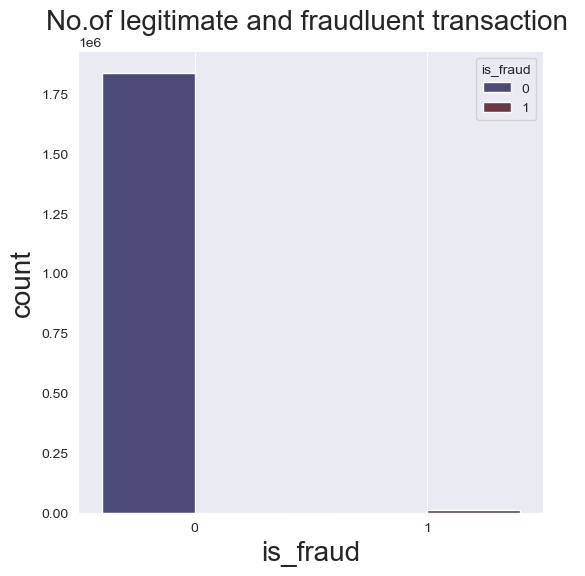

In [37]:
sns.set_style("darkgrid")
plt.figure(figsize = (6,6))
sns.countplot(x = df_no_outliers.is_fraud , hue =df_no_outliers.is_fraud,  data =df_no_outliers , palette = "icefire")

plt.grid()
plt.title("No.of legitimate and fraudluent transaction ",fontsize=20)
plt.ylabel("count",fontsize=20)
plt.xlabel("is_fraud",fontsize=20)
plt.show()

# above figure does not have fraudulent transaction.
# if we remove outliers in this dataset model cannot identify the fraudulent transaction.because those eliminate outliers are crusion for model can identify the fraudulent transaction.
# so, we cannot remove outliers in this dataset.

# Data exploration 

In [38]:
new_df = df_outliers

In [39]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 26 columns):
 #   Column       Dtype  
---  ------       -----  
 0   cc_num       int64  
 1   merchant     object 
 2   category     object 
 3   amt          float64
 4   first        object 
 5   last         object 
 6   gender       object 
 7   street       object 
 8   city         object 
 9   state        object 
 10  zip          int64  
 11  lat          float64
 12  long         float64
 13  city_pop     int64  
 14  job          object 
 15  dob          object 
 16  trans_num    object 
 17  unix_time    int64  
 18  merch_lat    float64
 19  merch_long   float64
 20  is_fraud     int64  
 21  year         int16  
 22  hour         int32  
 23  month        int32  
 24  day_of_week  int32  
 25  day          int32  
dtypes: float64(5), int16(1), int32(4), int64(5), object(11)
memory usage: 328.6+ MB


In [40]:
new_df.describe(include ="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
cc_num,1852394.0,NaN,NaN,NaN,417386038393710400.0,1309115265318020352.0,60416207185.0,180042946491150.0,3521417320836166.0,4642255475285942.0,4992346398065154048.0
merchant,1852394,693,fraud_Kilback LLC,6262,NaN,NaN,NaN,NaN,NaN,NaN,NaN
category,1852394,14,gas_transport,188029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
amt,1852394.0,NaN,NaN,NaN,70.063567,159.253975,1.0,9.64,47.45,83.1,28948.9
first,1852394,355,Christopher,38112,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,1852394,486,Smith,40940,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,1852394,2,F,1014749,NaN,NaN,NaN,NaN,NaN,NaN,NaN
street,1852394,999,444 Robert Mews,4392,NaN,NaN,NaN,NaN,NaN,NaN,NaN
city,1852394,906,Birmingham,8040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
state,1852394,51,TX,135269,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# plotting total no.of legitimate and fraudulent transaction

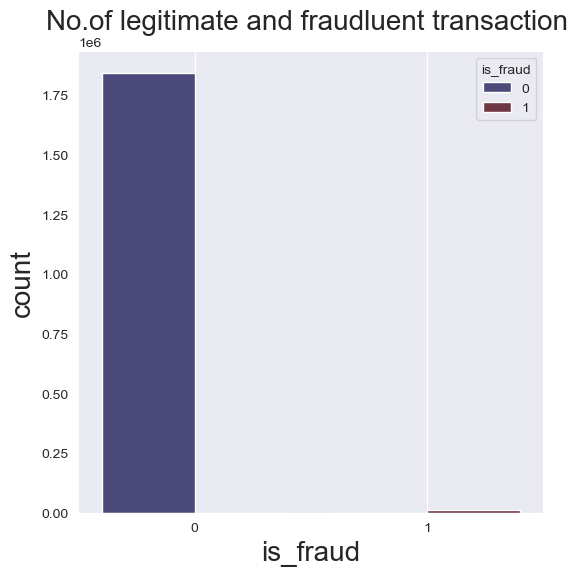

In [41]:
sns.set_style("darkgrid")
plt.figure(figsize = (6,6))
sns.countplot(x = df.is_fraud , hue =df.is_fraud,  data =df , palette = "icefire")

plt.grid()
plt.title("No.of legitimate and fraudluent transaction ",fontsize=20)
plt.ylabel("count",fontsize=20)
plt.xlabel("is_fraud",fontsize=20)
plt.show()

In [42]:
## Here doing outliers rmoving process elimiate the fradulent transcation. so we should not do this process.

In [43]:
df.gender.head()

0    F
1    F
2    M
3    M
4    M
Name: gender, dtype: object

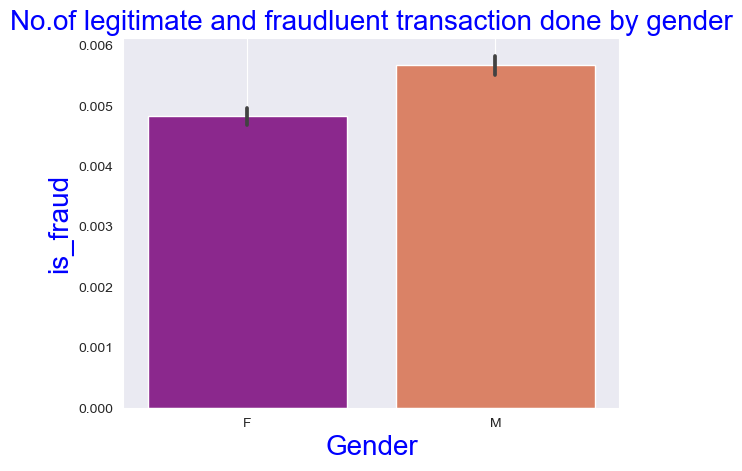

In [44]:
sns.barplot(x = df.gender , y = df.is_fraud , data = df , palette = "plasma")

plt.grid()
plt.title("No.of legitimate and fraudluent transaction done by gender",fontsize=20,color= 'b')
plt.xlabel("Gender",fontsize=20,color = 'blue')
plt.ylabel("is_fraud",fontsize=20, color = "blue")
plt.show()

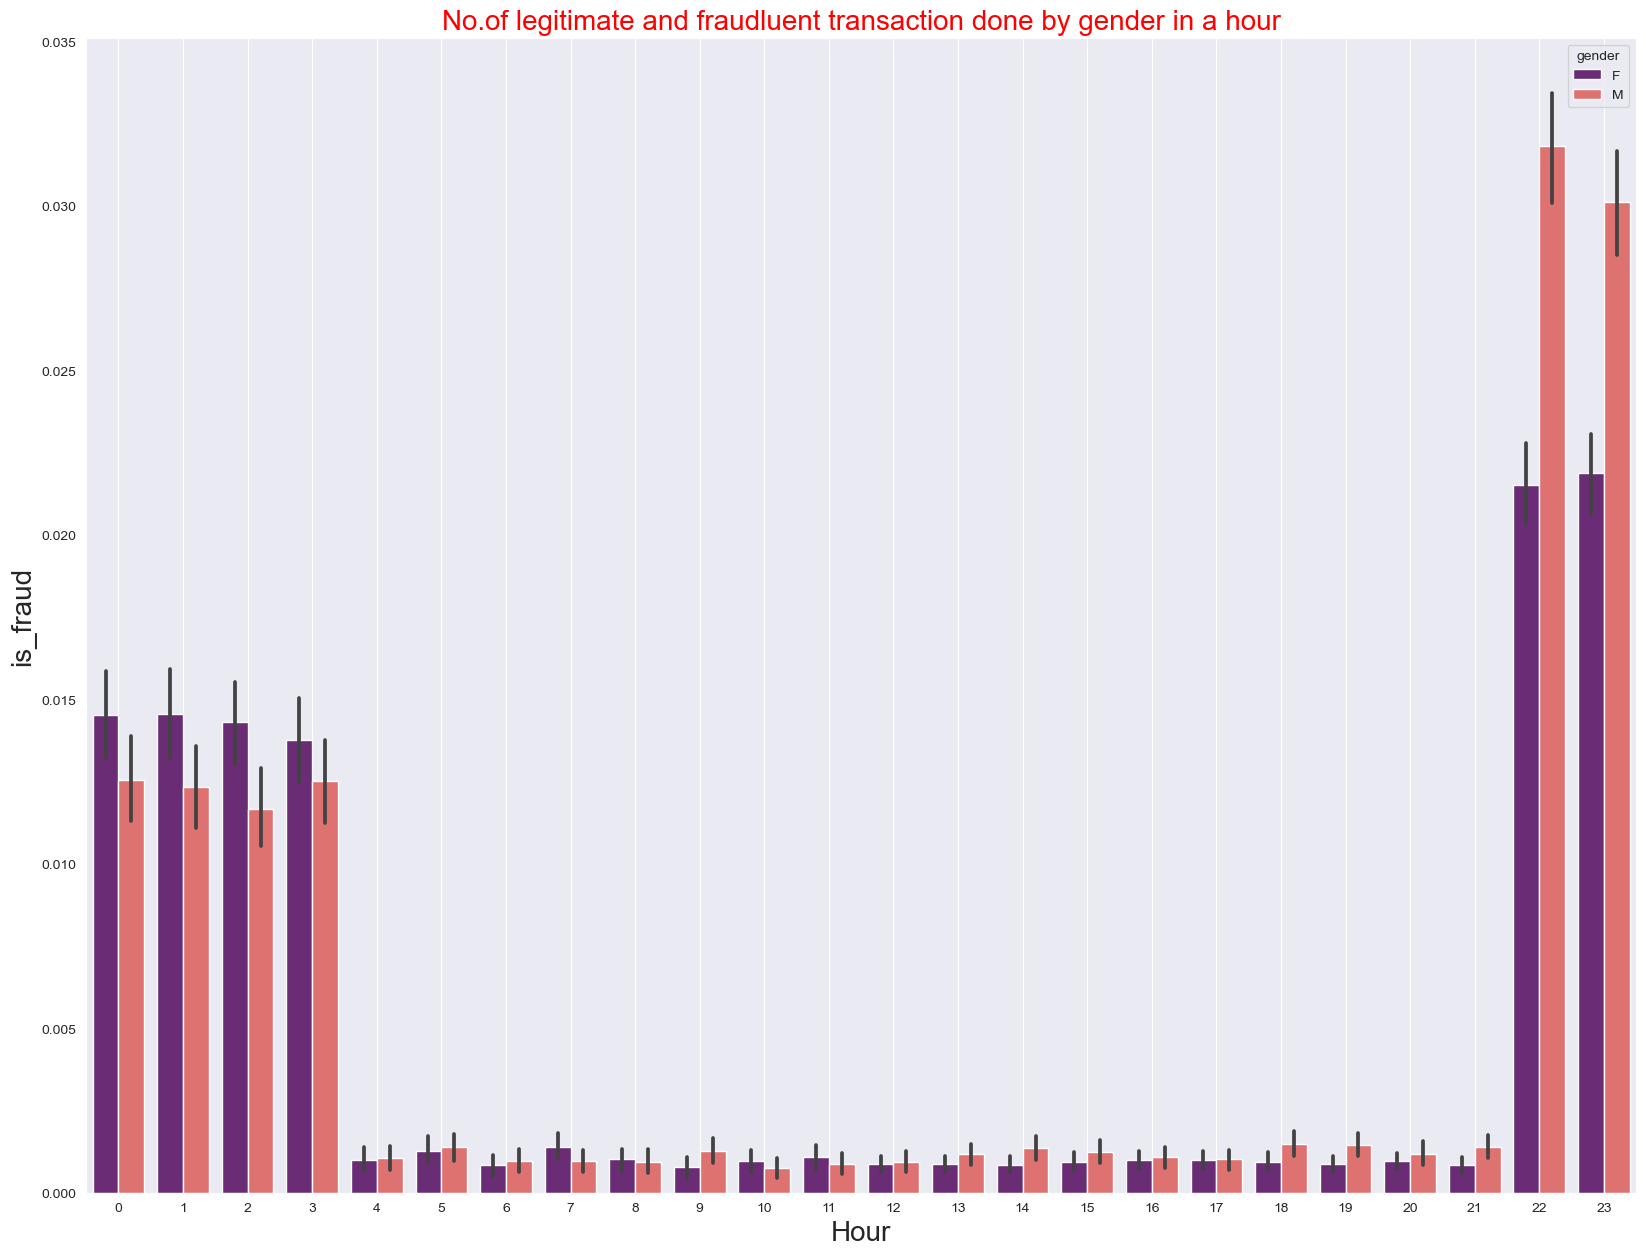

In [45]:
plt.figure(figsize = (20,15))

sns.barplot( x = df.hour , y = df.is_fraud , hue = df.gender , data = new_df, palette = "magma")

plt.grid()
plt.title("No.of legitimate and fraudluent transaction done by gender in a hour",fontsize=20,color= 'r')
plt.xlabel("Hour",fontsize=20)
plt.ylabel("is_fraud",fontsize=20)
plt.show()

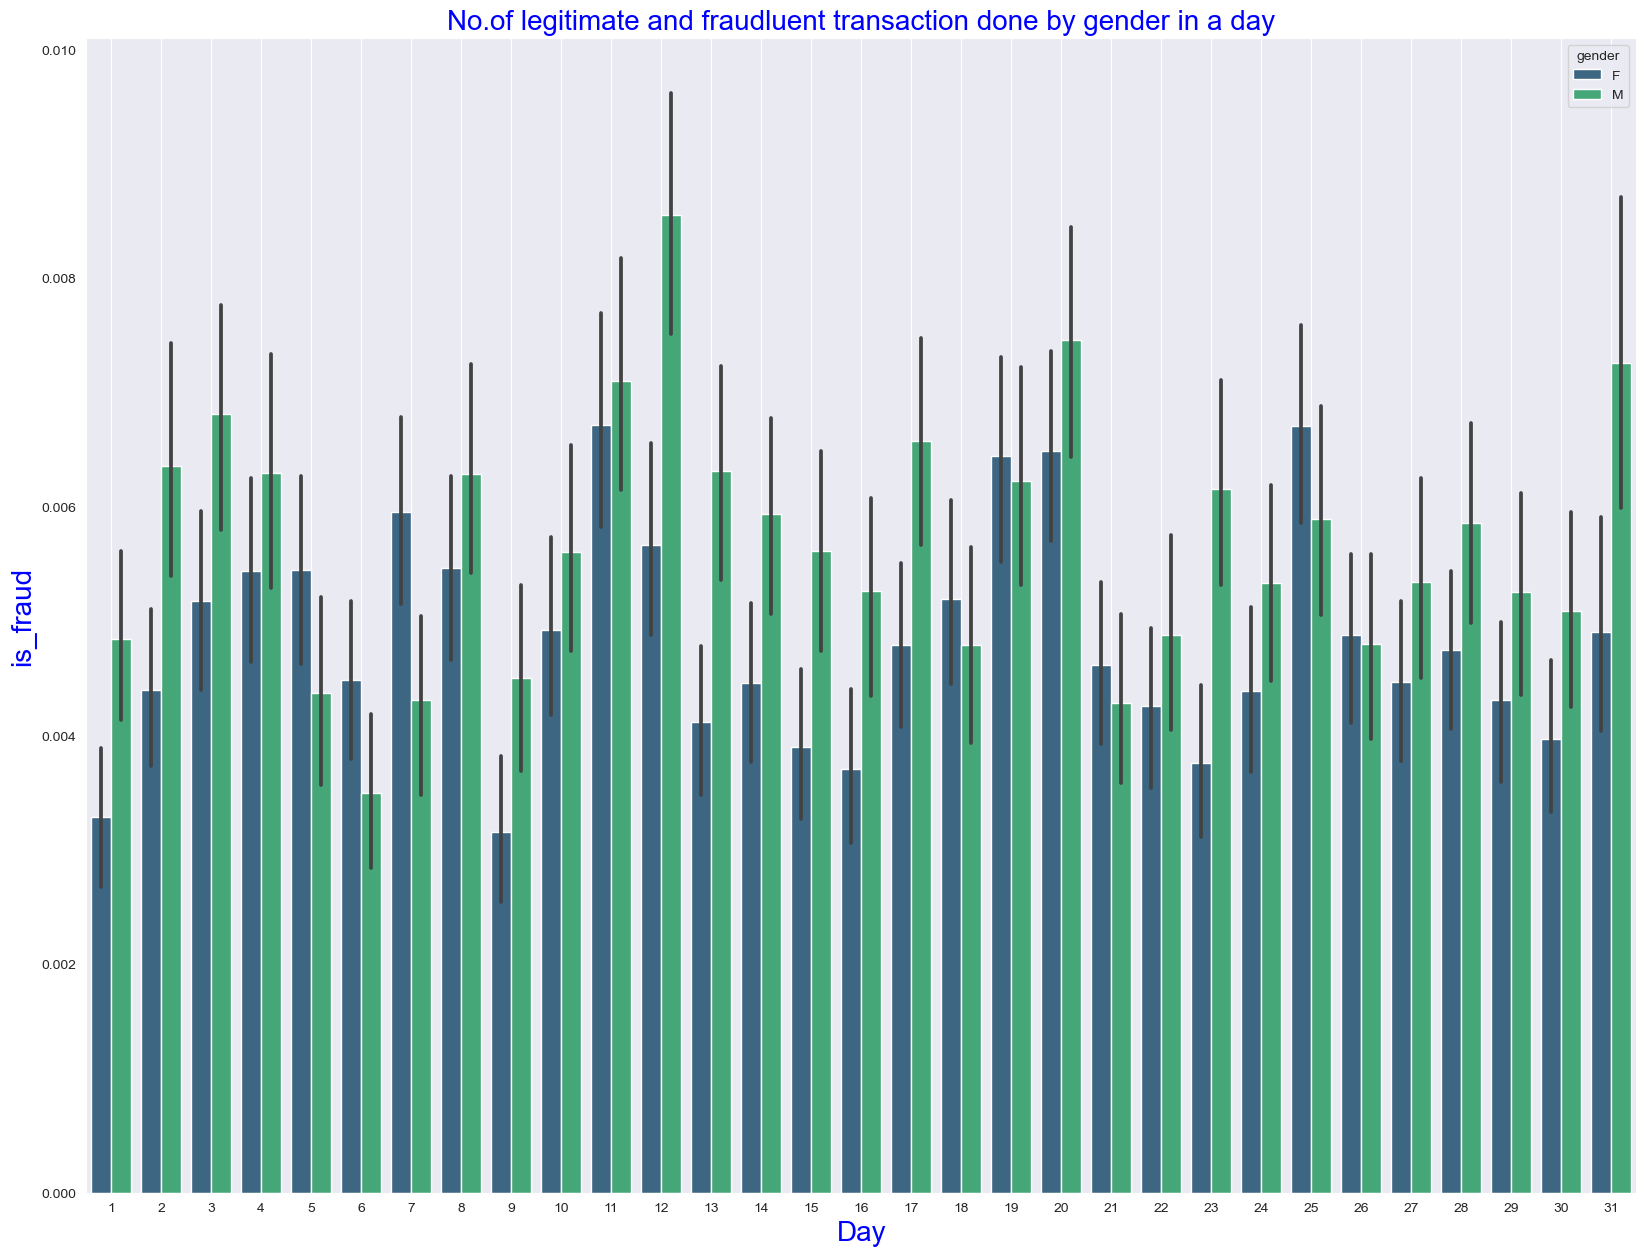

In [46]:
plt.figure(figsize = (20,15))
sns.barplot( x = df.day ,  y = df.is_fraud, hue = df.gender  , data = df, palette = "viridis")

plt.grid()
plt.title("No.of legitimate and fraudluent transaction done by gender in a day",fontsize=20,color= 'b')
plt.xlabel("Day",fontsize=20,color = 'blue')
plt.ylabel("is_fraud",fontsize=20, color = "blue")
plt.show()

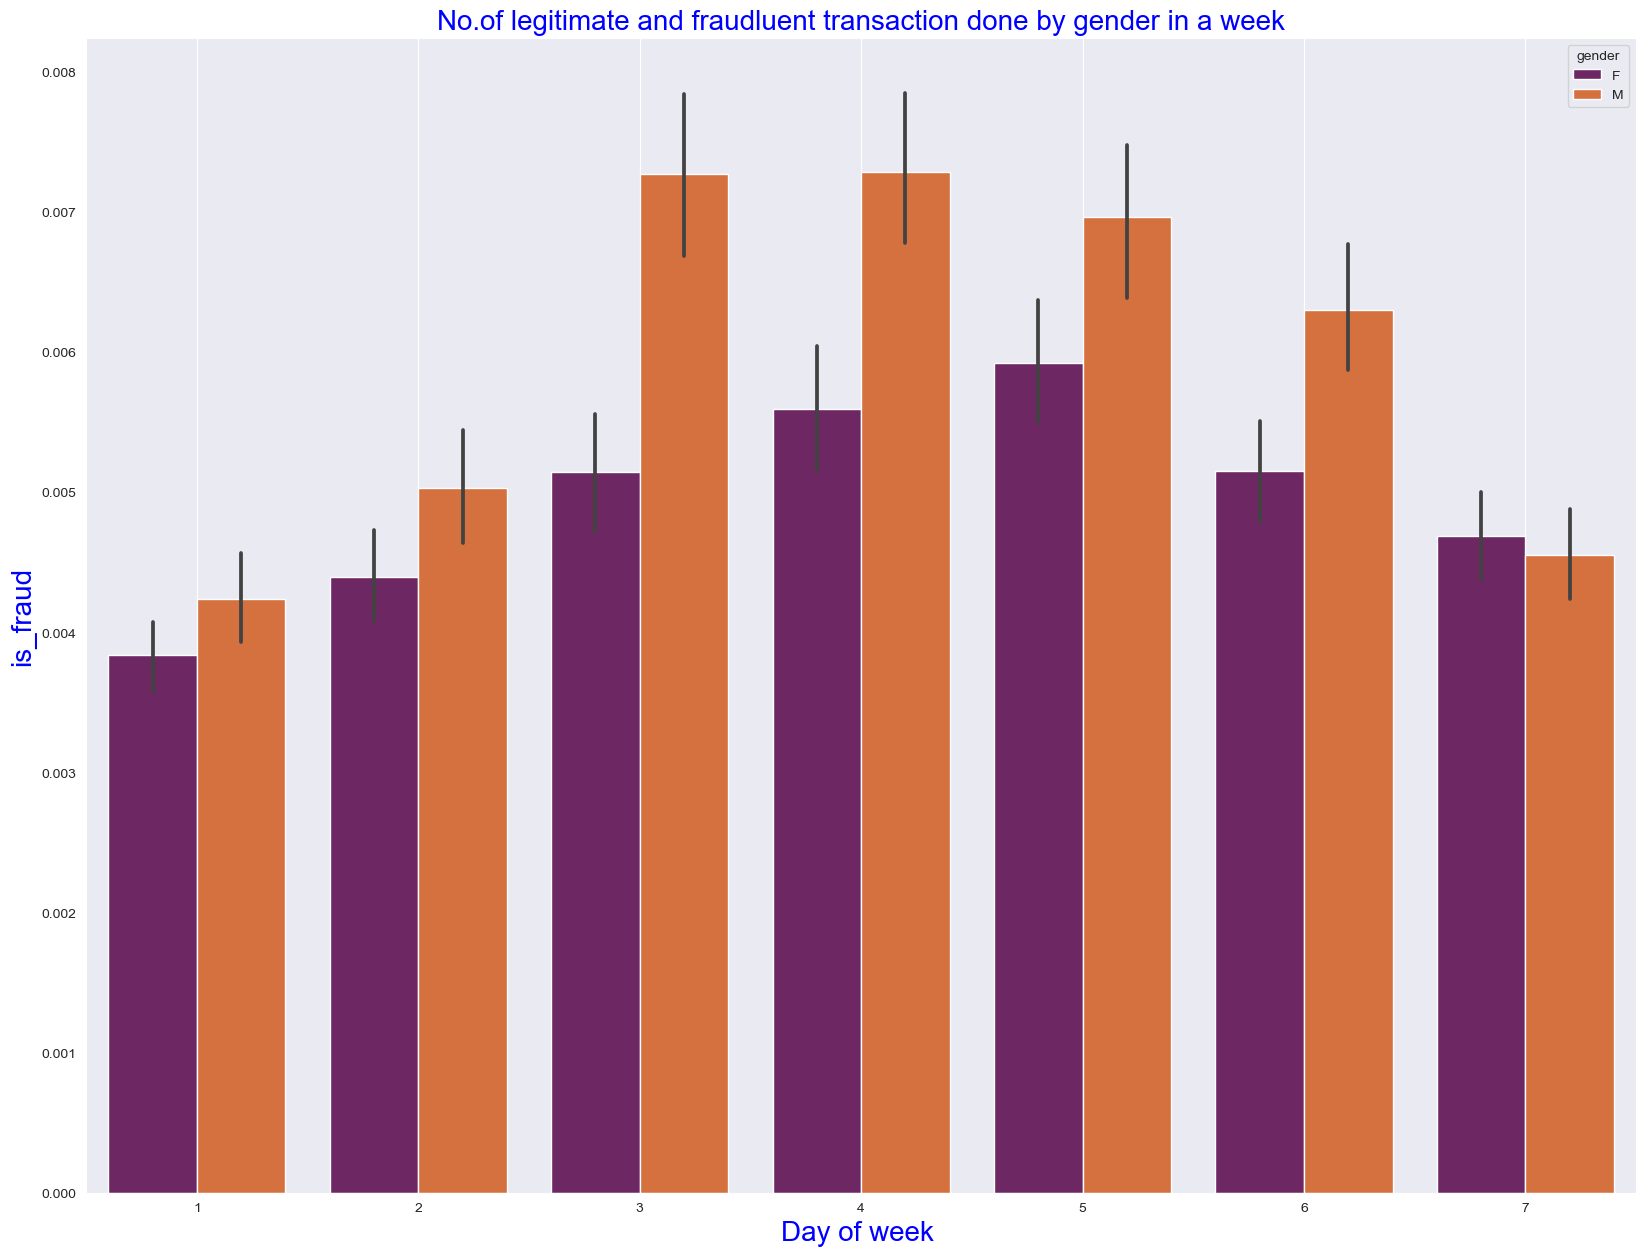

In [47]:
plt.figure(figsize = (20,15))
sns.barplot( x = df.day_of_week ,  y = df.is_fraud, hue = df.gender  , data = df, palette = "inferno")

plt.grid()
plt.title("No.of legitimate and fraudluent transaction done by gender in a week",fontsize=20,color= 'b')
plt.xlabel("Day of week ",fontsize=20,color = 'blue')
plt.ylabel("is_fraud",fontsize=20, color = "blue")
plt.show()

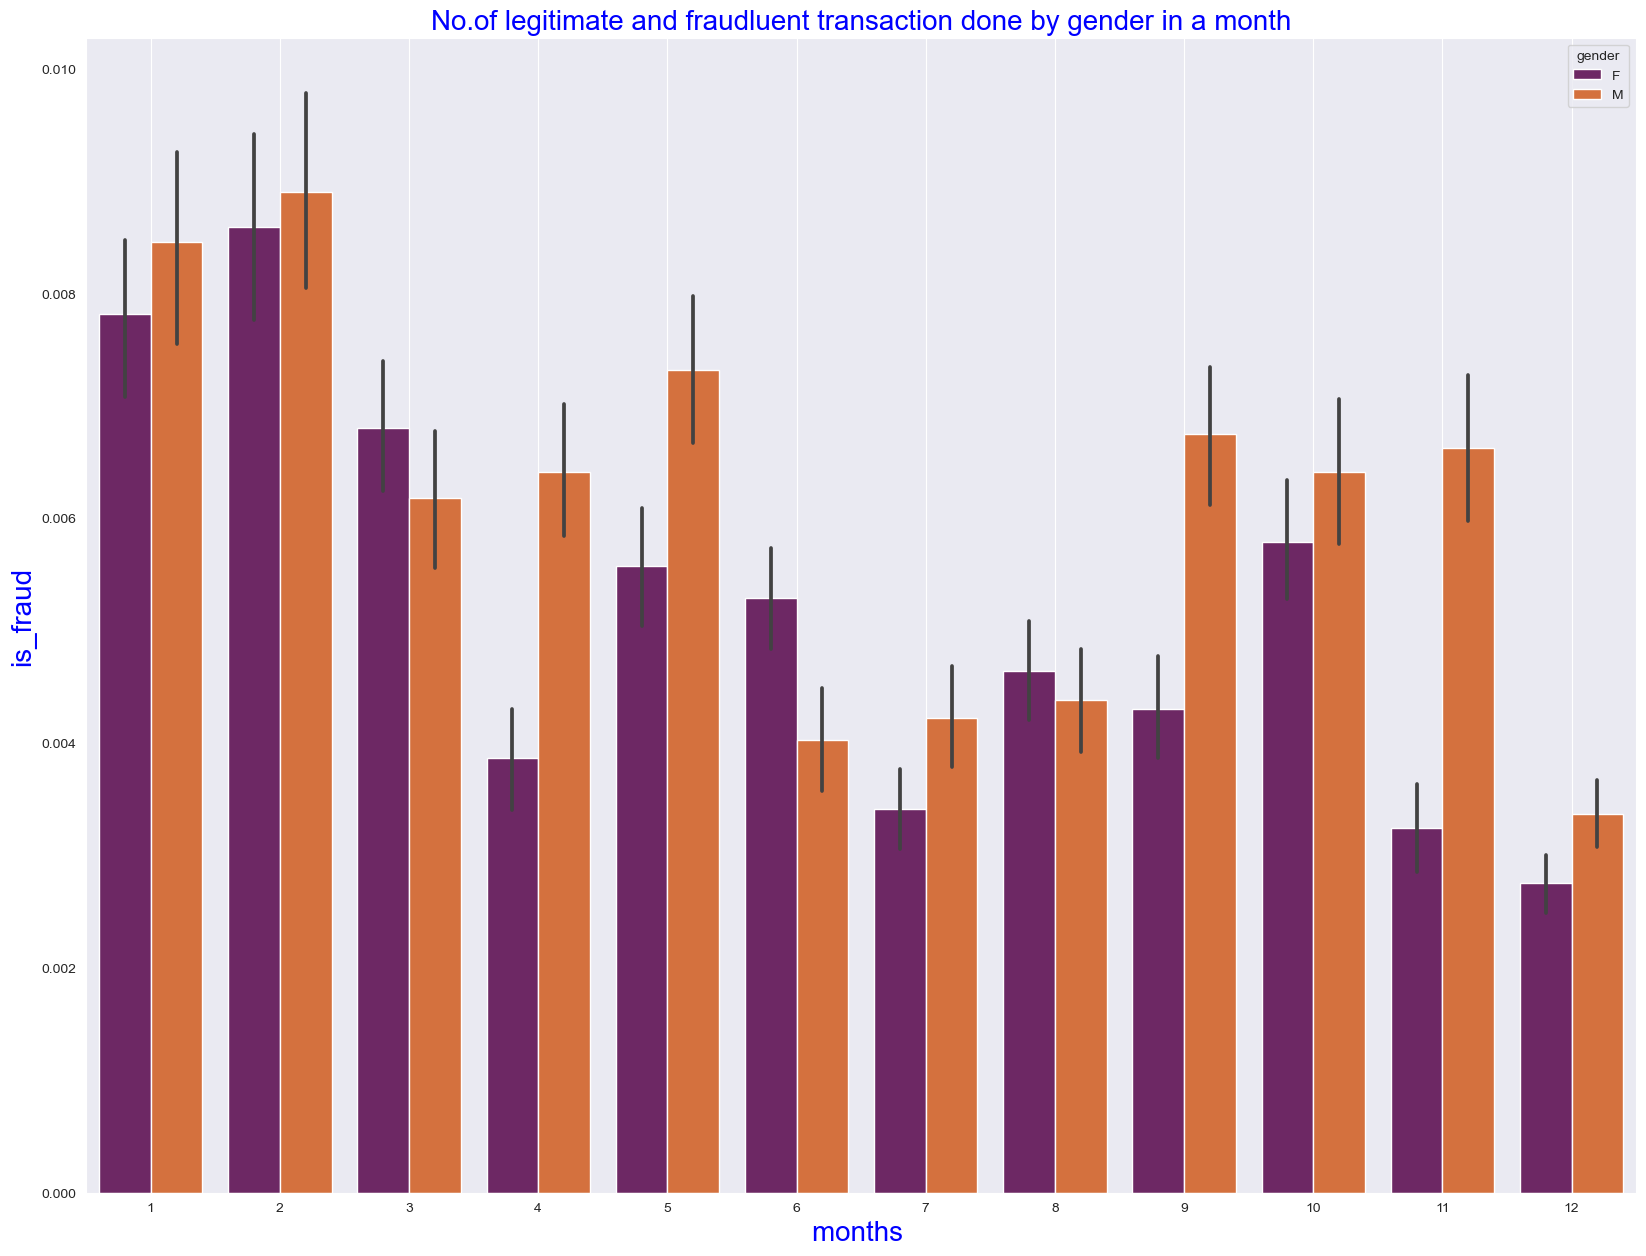

In [48]:
plt.figure(figsize = (20,15))
sns.barplot( x = df.month ,  y = df.is_fraud, hue = df.gender  , data = df, palette = "inferno")

plt.grid()
plt.title("No.of legitimate and fraudluent transaction done by gender in a month",fontsize=20,color= 'b')
plt.xlabel("months ",fontsize=20,color = 'blue')
plt.ylabel("is_fraud",fontsize=20, color = "blue")
plt.show()

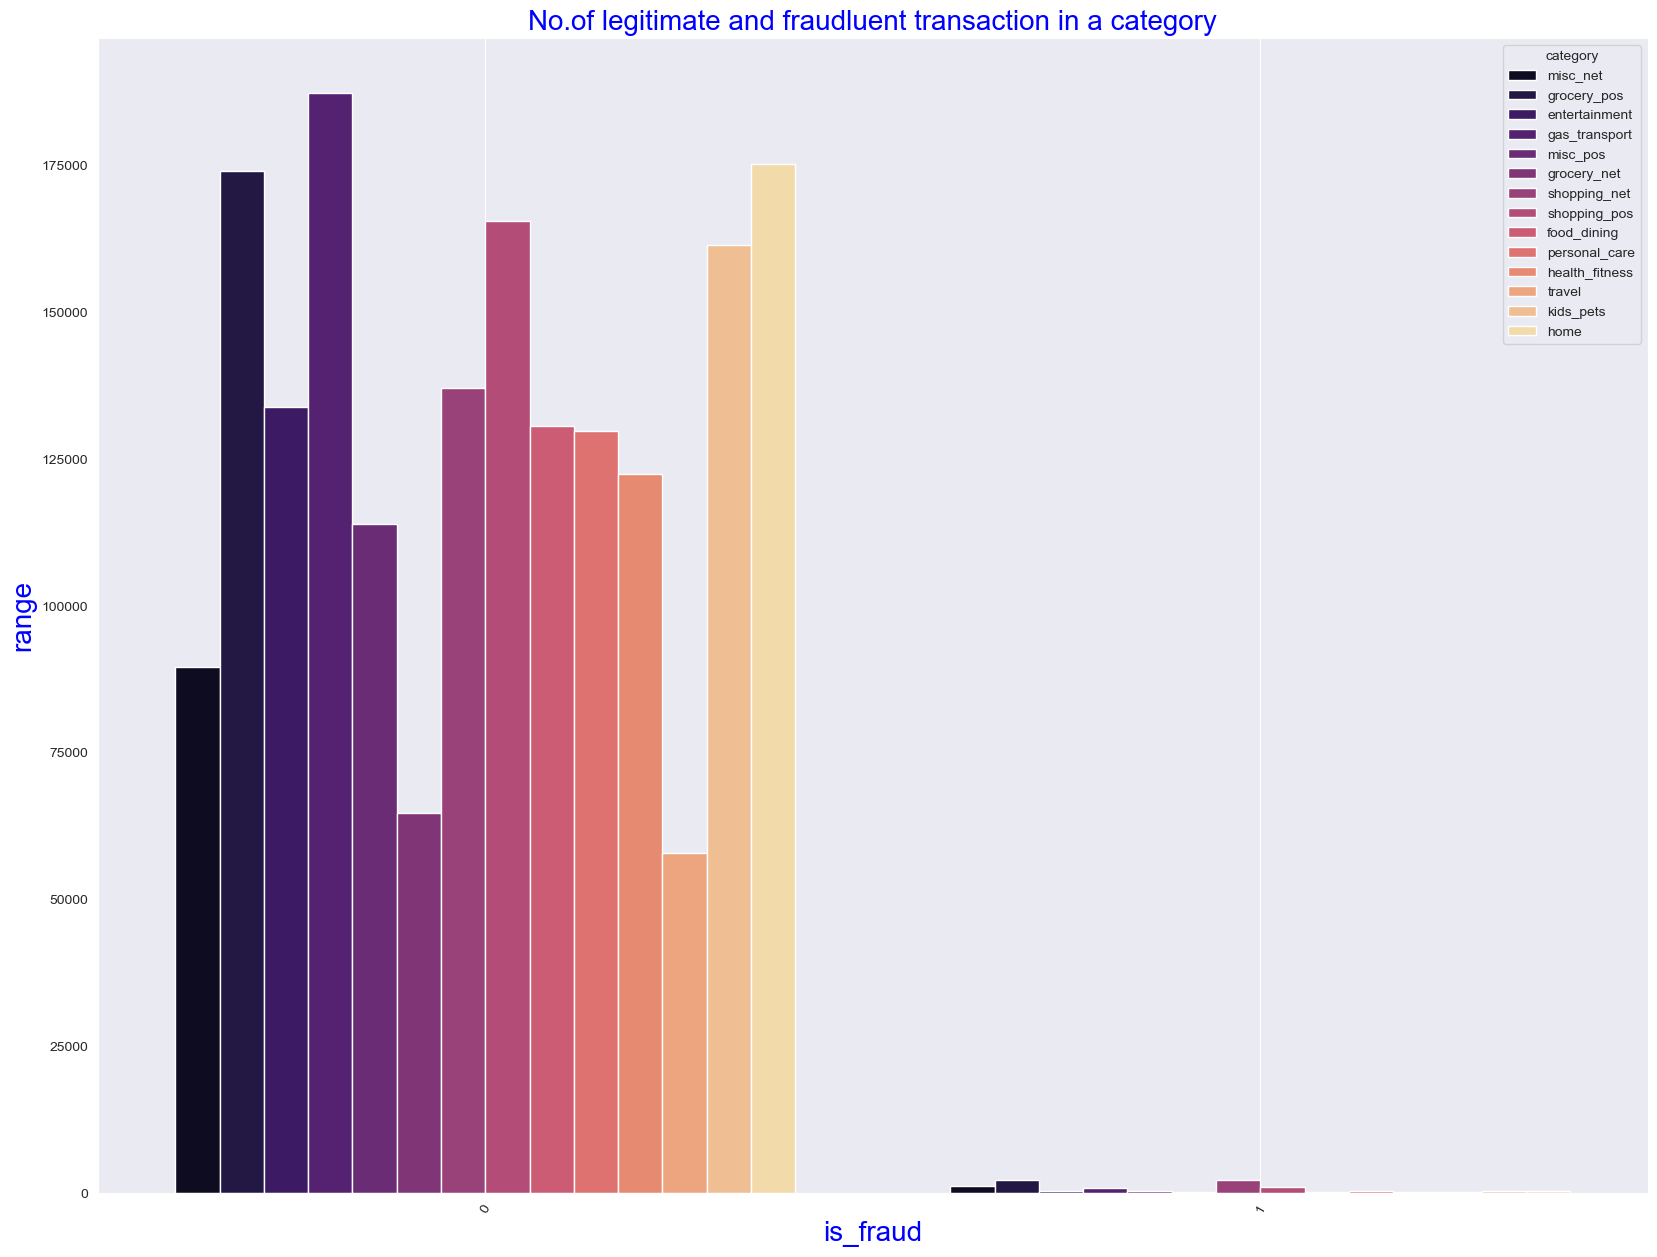

In [49]:
plt.figure(figsize = (20,15))
sns.countplot(x=df.is_fraud,hue = df.category , data=df , palette = "magma")
#sns.barplot( x = df.category , y = df.is_fraud , hue = df.gender , palette = "icefire")
plt.xticks(rotation = 60)
plt.grid()
plt.title("No.of legitimate and fraudluent transaction in a category",fontsize=20,color= 'b')
plt.xlabel("is_fraud",fontsize=20,color = 'blue')
plt.ylabel("range",fontsize=20, color = "blue")
plt.show()

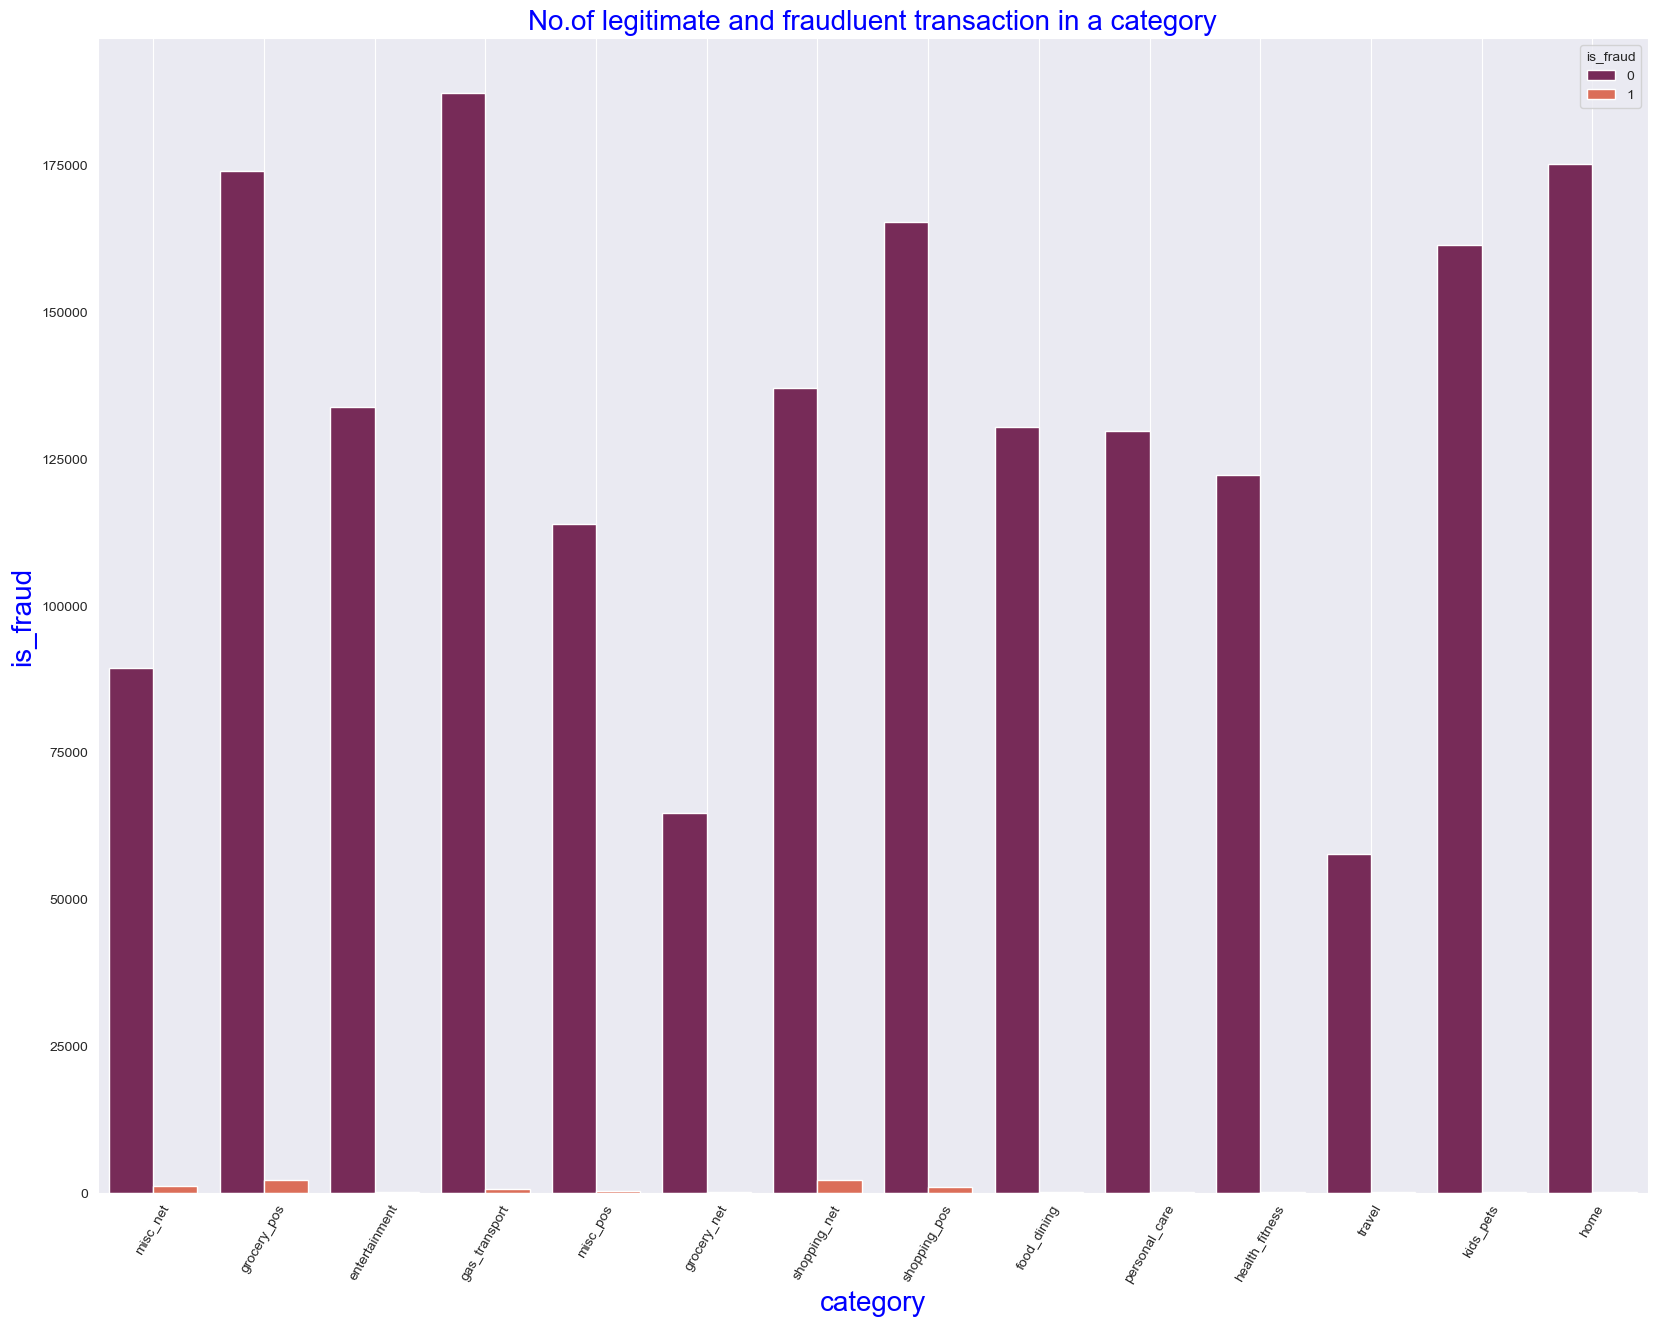

In [50]:
plt.figure(figsize = (20,15))
sns.countplot(x=df.category,hue = df.is_fraud , data=df , palette = "rocket")

plt.xticks(rotation = 60)
plt.grid()
plt.title("No.of legitimate and fraudluent transaction in a category",fontsize=20,color= 'b')
plt.xlabel("category",fontsize=20,color = 'blue')
plt.ylabel("is_fraud",fontsize=20, color = "blue")
plt.show()

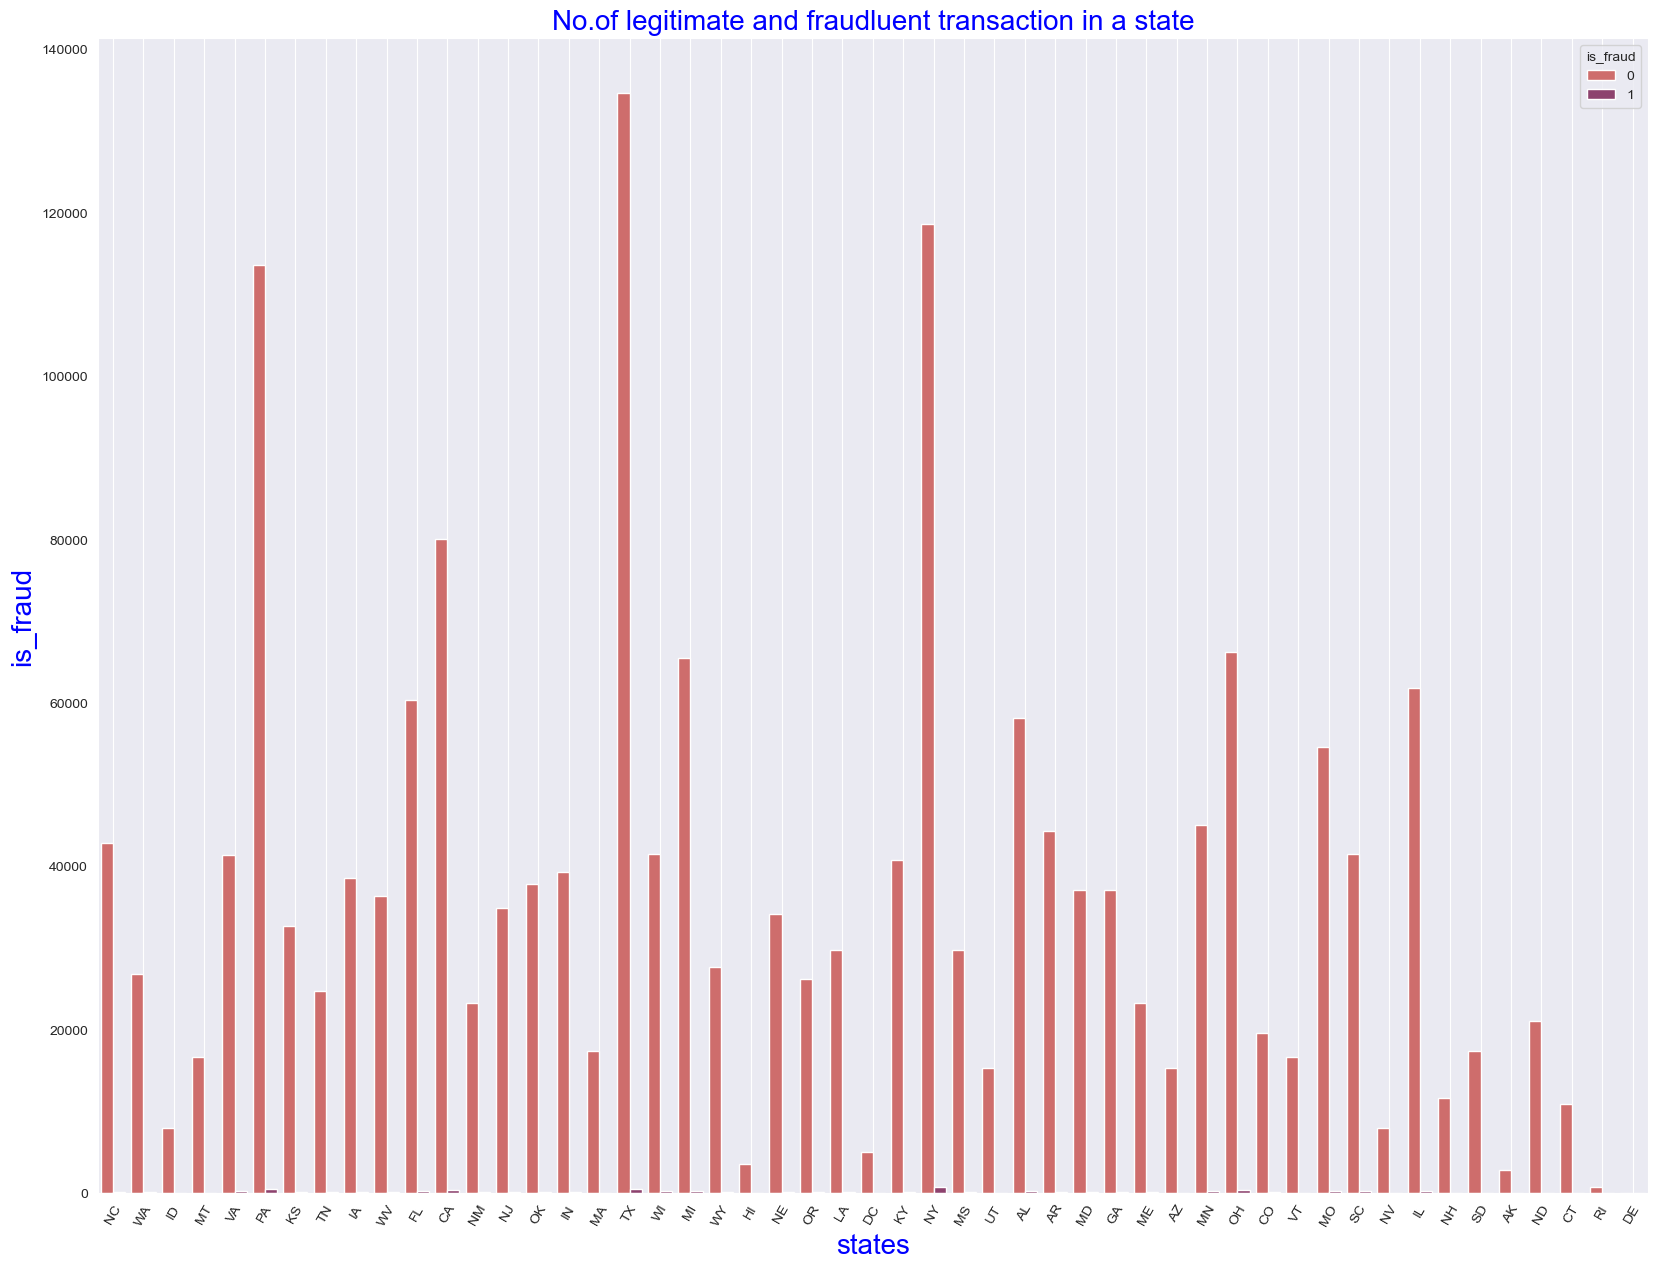

In [51]:
plt.figure(figsize = (20,15))
sns.countplot(x=df.state,hue = df.is_fraud , data=df , palette = "flare")

plt.xticks(rotation = 60)
plt.grid()
plt.title("No.of legitimate and fraudluent transaction in a state",fontsize=20,color= 'b')
plt.xlabel("states",fontsize=20,color = 'blue')
plt.ylabel("is_fraud",fontsize=20, color = "blue")
plt.show()

# Model Preparation

In [52]:
df["gender"] = df["gender"].map({'M':0 , 'F':1})

In [53]:
df.gender.head()

0    1
1    1
2    0
3    0
4    0
Name: gender, dtype: int64

In [54]:
df.gender.value_counts()

gender
1    1014749
0     837645
Name: count, dtype: int64

In [55]:
df_outliers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 26 columns):
 #   Column       Dtype  
---  ------       -----  
 0   cc_num       int64  
 1   merchant     object 
 2   category     object 
 3   amt          float64
 4   first        object 
 5   last         object 
 6   gender       object 
 7   street       object 
 8   city         object 
 9   state        object 
 10  zip          int64  
 11  lat          float64
 12  long         float64
 13  city_pop     int64  
 14  job          object 
 15  dob          object 
 16  trans_num    object 
 17  unix_time    int64  
 18  merch_lat    float64
 19  merch_long   float64
 20  is_fraud     int64  
 21  year         int16  
 22  hour         int32  
 23  month        int32  
 24  day_of_week  int32  
 25  day          int32  
dtypes: float64(5), int16(1), int32(4), int64(5), object(11)
memory usage: 328.6+ MB


In [56]:
df_outliers.gender.value_counts()

gender
F    1014749
M     837645
Name: count, dtype: int64

In [57]:
df_outliers["gender"] = df_outliers["gender"].map({'M':0 , 'F':1})

In [58]:
df_outliers.gender.value_counts()

gender
1    1014749
0     837645
Name: count, dtype: int64

In [59]:
df_new = df_outliers

In [60]:
X = df_new.drop(["is_fraud"], axis = True)

Y = df_new["is_fraud"]

## Encoding the categorical

In [61]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()
print(encoder)

OrdinalEncoder()


In [62]:
cat_col = X.select_dtypes(include = ["object"]).columns
print(cat_col)

Index(['merchant', 'category', 'first', 'last', 'street', 'city', 'state',
       'job', 'dob', 'trans_num'],
      dtype='object')


In [63]:
X[cat_col] = encoder.fit_transform(X[cat_col])
print(X[cat_col])

         merchant  category  first   last  street   city  state    job    dob  \
0           514.0       8.0  164.0   18.0   576.0  532.0   27.0  372.0  791.0   
1           241.0       4.0  312.0  161.0   439.0  619.0   47.0  431.0  619.0   
2           390.0       0.0  116.0  386.0   610.0  474.0   13.0  308.0  309.0   
3           360.0       2.0  165.0  468.0   945.0   84.0   26.0  330.0  405.0   
4           297.0       9.0  339.0  153.0   422.0  217.0   45.0  116.0  746.0   
...           ...       ...    ...    ...     ...    ...    ...    ...    ...   
1852389     507.0       5.0  245.0  323.0   573.0  471.0   24.0  477.0  386.0   
1852390     264.0       7.0  180.0  438.0   583.0  427.0   43.0  207.0  961.0   
1852391     496.0       7.0   19.0  243.0   138.0  110.0   47.0  307.0  669.0   
1852392      75.0      13.0  120.0  351.0   711.0  508.0   13.0   63.0  383.0   
1852393     125.0       0.0  293.0  148.0   838.0  239.0   36.0  289.0  873.0   

         trans_num  
0     

In [64]:
plt.figure(figsize=(8,10))
X.corr().style.background_gradient(cmap='viridis')

,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,year,hour,month,day_of_week,day
cc_num,1.000000,0.000437,0.000327,0.001826,-0.028370,0.006966,-0.000333,0.045937,0.049230,-0.036305,0.041504,-0.058744,-0.048429,-0.009118,0.029930,0.002213,0.000953,0.000284,-0.058415,-0.048421,0.000443,-0.000902,-0.000188,-0.000851,-0.000136
merchant,0.000437,1.000000,0.031020,-0.002973,-0.001415,-0.000456,0.001247,0.000307,-0.000731,-0.000266,0.000692,-0.001450,-0.000348,0.001281,0.000739,0.005710,-0.000329,-0.000169,-0.001362,-0.000353,-0.000375,-0.001460,0.000352,0.000043,-0.000399
category,0.000327,0.031020,1.000000,0.029665,-0.002016,-0.003838,0.028088,0.002361,-0.000045,0.000164,0.003013,-0.008526,-0.001406,0.009318,0.002993,0.003809,-0.000653,0.001043,-0.008417,-0.001404,0.000357,0.157991,0.001071,-0.001373,-0.000283
amt,0.001826,-0.002973,0.029665,1.000000,-0.002379,-0.005158,-0.000740,0.001296,-0.000240,0.000433,0.001979,-0.000670,-0.000735,0.004921,-0.001858,0.011501,-0.001687,-0.002411,-0.000613,-0.000711,-0.001266,-0.024891,-0.002593,0.000491,0.000069
first,-0.028370,-0.001415,-0.002016,-0.002379,1.000000,-0.057713,-0.015354,-0.046412,-0.009473,0.043704,0.004135,0.131330,-0.015640,-0.066928,-0.039918,0.004096,-0.000162,0.000032,0.130352,-0.015660,-0.000034,-0.003461,0.000108,-0.000256,0.000292
last,0.006966,-0.000456,-0.003838,-0.005158,-0.057713,1.000000,-0.043363,0.005119,0.018603,-0.047943,0.028518,-0.033958,-0.025842,-0.011417,-0.023984,-0.018503,-0.000544,-0.000112,-0.033658,-0.025831,-0.000630,0.000728,0.000819,0.001263,0.000572
gender,-0.000333,0.001247,0.028088,-0.000740,-0.015354,-0.043363,1.000000,-0.042402,-0.016330,0.031085,0.066106,-0.042862,-0.050653,0.028862,0.079708,0.012160,0.000337,0.001387,-0.042621,-0.050606,0.001127,0.038039,0.000719,0.000013,0.000077
street,0.045937,0.000307,0.002361,0.001296,-0.046412,0.005119,-0.042402,1.000000,-0.024595,0.014470,-0.054019,-0.012851,0.071712,-0.012392,-0.018591,-0.042617,-0.000969,-0.001480,-0.012730,0.071667,-0.001505,-0.009775,-0.000278,-0.001079,-0.000631
city,0.049230,-0.000731,-0.000045,-0.000240,-0.009473,0.018603,-0.016330,-0.024595,1.000000,-0.042611,0.075212,-0.031132,-0.067092,0.034824,0.021540,0.014806,0.000565,0.000657,-0.030870,-0.067070,0.000722,0.006995,-0.000024,-0.001214,0.000768
state,-0.036305,-0.000266,0.000164,0.000433,0.043704,-0.047943,0.031085,0.014470,-0.042611,1.000000,-0.116563,0.213532,0.132324,-0.012633,0.043112,0.053565,0.000621,-0.000331,0.212190,0.132217,-0.000195,0.007033,-0.000280,0.000649,-0.000741


<Figure size 800x1000 with 0 Axes>

## Scaling

In [65]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

print(scaler)

MinMaxScaler()


In [66]:
X = scaler.fit_transform(X)

In [67]:
print(X)

[[5.41453976e-04 7.42774566e-01 6.15384615e-01 ... 0.00000000e+00
  1.66666667e-01 0.00000000e+00]
 [1.14176199e-07 3.48265896e-01 3.07692308e-01 ... 0.00000000e+00
  1.66666667e-01 0.00000000e+00]
 [7.77171158e-06 5.63583815e-01 0.00000000e+00 ... 0.00000000e+00
  1.66666667e-01 0.00000000e+00]
 ...
 [1.20417608e-03 7.16763006e-01 5.38461538e-01 ... 1.00000000e+00
  5.00000000e-01 1.00000000e+00]
 [8.05103937e-07 1.08381503e-01 1.00000000e+00 ... 1.00000000e+00
  5.00000000e-01 1.00000000e+00]
 [8.35404572e-04 1.80635838e-01 0.00000000e+00 ... 1.00000000e+00
  5.00000000e-01 1.00000000e+00]]


In [68]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

# Model selection 

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay,classification_report

In [70]:
model_1 = LogisticRegression()
model_2 = DecisionTreeClassifier()
model_3 = RandomForestClassifier(random_state=42,n_estimators=50)

In [71]:
model_1.fit(X_train,Y_train)

LogisticRegression()

In [72]:
model_2.fit(X_train,Y_train)

DecisionTreeClassifier()

In [73]:
model_3.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=50, random_state=42)

# LogisticRegression

In [74]:
x_train_accuracy_1 = model_1.predict(X_train)
x_test_accuracy_1 = model_1.predict(X_test)

training_data_accuracy_1 = accuracy_score(x_train_accuracy_1,Y_train)
testing_data_accuracy_1 = accuracy_score(x_test_accuracy_1,Y_test)

print('Training Accuracy : ', training_data_accuracy_1)
print('Testing  Accuracy : ', testing_data_accuracy_1)

Training Accuracy :  0.9945968560949852
Testing  Accuracy :  0.994523306314258


In [75]:
print(f"\nClassification Report for Logistic Regression:\n{classification_report(Y_test, x_test_accuracy_1)}")


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    368529
           1       0.00      0.00      0.00      1950

    accuracy                           0.99    370479
   macro avg       0.50      0.50      0.50    370479
weighted avg       0.99      0.99      0.99    370479



# Confusion Matrix

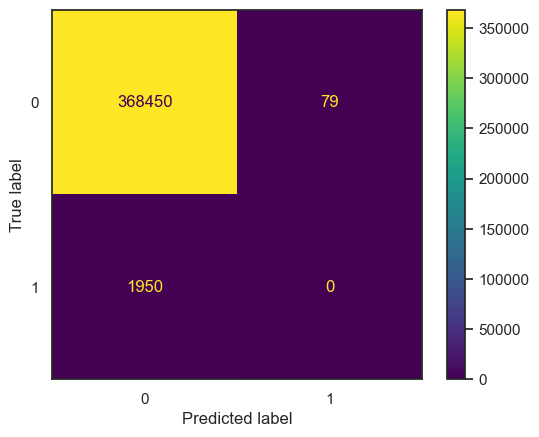

In [76]:
sns.set(style = "white")

ConfusionMatrixDisplay.from_estimator(model_1, X_test, Y_test , cmap = "viridis")

plt.show()

# DecisionTreeClassifier

In [77]:
X_train_accuracy_2 = model_2.predict(X_train)
X_test_accuracy_2 = model_2.predict(X_test)

training_data_accuracy_2 = accuracy_score(X_train_accuracy_2,Y_train) 
testing_data_accuracy_2  = accuracy_score(X_test_accuracy_2,Y_test) 

print('Training Accuracy : ', training_data_accuracy_2)
print('Testing  Accuracy : ', testing_data_accuracy_2)

Training Accuracy :  1.0
Testing  Accuracy :  0.9980025858415726


In [78]:
print(f"\nClassification Report for DecisionTreeClassifier:\n{classification_report(Y_test, X_test_accuracy_2)}")


Classification Report for DecisionTreeClassifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    368529
           1       0.80      0.83      0.81      1950

    accuracy                           1.00    370479
   macro avg       0.90      0.92      0.91    370479
weighted avg       1.00      1.00      1.00    370479



## Confusion Matrix

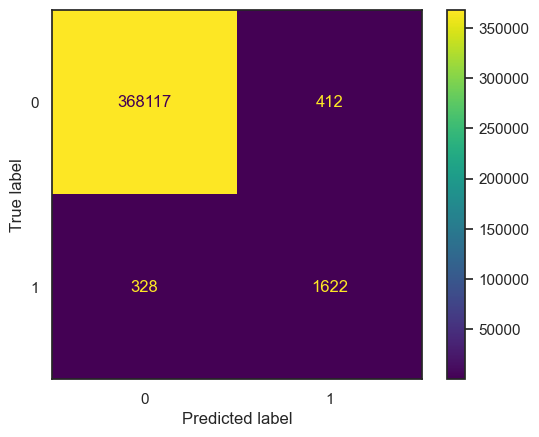

In [79]:
sns.set(style = "white")
ConfusionMatrixDisplay.from_estimator(model_2, X_test, Y_test , cmap = "viridis")

plt.show()

# RandomForestClassifier

In [80]:
X_train_accuracy_3 = model_3.predict(X_train)
X_test_accuracy_3 = model_3.predict(X_test)

training_data_accuracy_3 = accuracy_score(X_train_accuracy_3,Y_train) 
testing_data_accuracy_3 = accuracy_score(X_test_accuracy_3,Y_test) 

print('Training Accuracy : ', training_data_accuracy_3)
print('Testing  Accuracy : ', testing_data_accuracy_3)

Training Accuracy :  0.9999865039492818
Testing  Accuracy :  0.9985586227559456


In [81]:
print(f"\nClassification Report for RandomForestClassifier:\n{classification_report(Y_test, X_test_accuracy_3)}")


Classification Report for RandomForestClassifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    368529
           1       0.98      0.74      0.84      1950

    accuracy                           1.00    370479
   macro avg       0.99      0.87      0.92    370479
weighted avg       1.00      1.00      1.00    370479



## Confusion Matrix

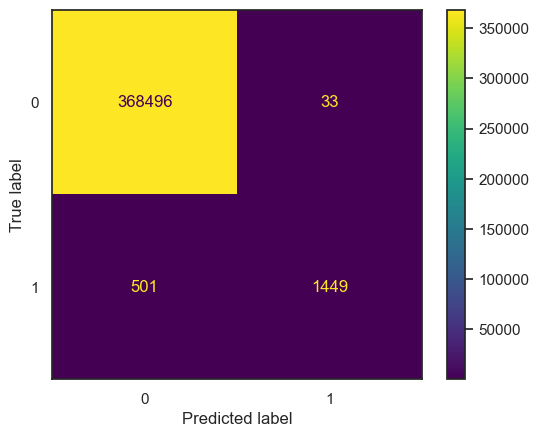

In [82]:
sns.set(style = "white")

ConfusionMatrixDisplay.from_estimator(model_3, X_test, Y_test ,  cmap = "viridis")

plt.show()

# Actual Values:
* TN(368492): our model can identify 368492 legitimate transaction in dataset.
* FP :Our model can identify 37 values wrongly(count of actual fraudulent transactions ) there was a legitimate transaction unfortunately they are no legitimate transaction .
# Predicted Values:
* FN: Our model can misses the legitimate transaction .
* TP: Our model can correctly classify the fraudulent transaction.

# Conclusion:

* 1.Actually LogisticRegression() performance was very poor it cannot identify the singe fraudulent transaction in dataset.
* 2.But DecisionTreeClassifier() and RandomForestClassifier() performance was efficient. DecisionTreeClassifier() model can classify 335 legitimate transaction and 1615 fraudulent transaction.
* 3.RandomForestClassifier() model can classify 501 legitimate transaction and 1449 fraudulent transaction.
* 4.By comparing both modles we can understand that DecisionTreeClassifier() model can identify more legitimate and fraudulent transaction.